<a href="https://colab.research.google.com/github/Saishivani1/EXPLORATORY-DATA-ANALYTICS-THEORY/blob/main/21BDS0274_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

REG NO: 21BDS0274

NAME: P.SAI SIVANI

EXPLORATORY DATA ANALYTICS

Digital Assessment-I
Develop a model for the below dataset using Python Code.

Procedure to Follow:
1. Create a github account and from the personal Google Colab interface your account.
2. Load the Dataset and explore Dimension, Summary, Data Handling, Data Cleaning, Univariate, Bivariate and Multivariate Analysis (Maximum of all the possibilities).
3. Complete your task in parallel alignment to the Theory Session (From Module 2 to Module 7)
4. To know more about the dataset attributes you can search on the web.
DATA SET: house price.csv

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4596 non-null   object 
 8   view           4599 non-null   float64
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4599 non-null   object 
d

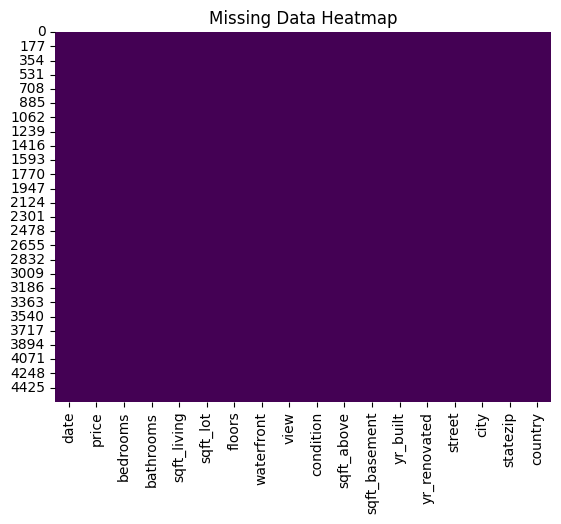

In [2]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('house price.csv')

# EDA Step 1: Basic Information
def eda_overview(dataframe):
    print("Data Info:\n")
    print(dataframe.info())
    print("\nSample Data:\n", dataframe.head())
    print("\nSummary Statistics:\n", dataframe.describe())
    print("\nMissing Values:\n", dataframe.isnull().sum())

eda_overview(df)

# EDA Step 2: Visualizing Missing Data
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


In [3]:
# Identifying data types
def identify_data_types(dataframe):
    numerical = dataframe.select_dtypes(include=['int64', 'float64']).columns
    categorical = dataframe.select_dtypes(include=['object']).columns
    print("Numerical Columns:", list(numerical))
    print("Categorical Columns:", list(categorical))

    # Further classify numerical columns
    discrete = [col for col in numerical if len(dataframe[col].unique()) < 20]
    continuous = [col for col in numerical if len(dataframe[col].unique()) >= 20]
    print("\nDiscrete Variables:", discrete)
    print("Continuous Variables:", continuous)

identify_data_types(df)


Numerical Columns: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
Categorical Columns: ['date', 'waterfront', 'street', 'city', 'statezip', 'country']

Discrete Variables: ['bedrooms', 'floors', 'view', 'condition']
Continuous Variables: ['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']


In [4]:
def classify_measurement_scales(dataframe):
    scales = {
        "Nominal": ['city', 'neighborhood'],  # Example
        "Ordinal": ['quality_rating'],       # Example
        "Interval": ['temperature'],         # Example
        "Ratio": ['price', 'size']           # Example
    }
    for scale, columns in scales.items():
        print(f"{scale} Scale Variables: {columns}")

# Replace example column names with actual columns in your dataset
classify_measurement_scales(df)


Nominal Scale Variables: ['city', 'neighborhood']
Ordinal Scale Variables: ['quality_rating']
Interval Scale Variables: ['temperature']
Ratio Scale Variables: ['price', 'size']


In [5]:
def classical_summary(dataframe):
    print("\nMean:\n", dataframe.mean(numeric_only=True))
    print("\nMedian:\n", dataframe.median(numeric_only=True))
    print("\nVariance:\n", dataframe.var(numeric_only=True))

classical_summary(df)



Mean:
 price            551962.988473
bedrooms              3.400870
bathrooms             2.160815
sqft_living        2139.346957
sqft_lot          14852.516087
floors                1.512065
view                  0.240705
condition             3.451739
sqft_above         1827.265435
sqft_basement       312.081522
yr_built           1970.786304
yr_renovated        808.608261
dtype: float64

Median:
 price            460943.46155
bedrooms              3.00000
bathrooms             2.25000
sqft_living        1980.00000
sqft_lot           7683.00000
floors                1.50000
view                  0.00000
condition             3.00000
sqft_above         1590.00000
sqft_basement         0.00000
yr_built           1976.00000
yr_renovated          0.00000
dtype: float64

Variance:
 price            3.179096e+11
bedrooms         8.260049e-01
bathrooms        6.143128e-01
sqft_living      9.277676e+05
sqft_lot         1.287693e+09
floors           2.897544e-01
view             6.060331e-0

In [6]:
from collections import Counter

def bayesian_example(dataframe, column):
    prior = 0.5  # Assume 50% probability for binary categories
    counts = Counter(dataframe[column].dropna())
    total = sum(counts.values())
    likelihood = counts['Yes'] / total  # Adjust with actual categories
    posterior = (likelihood * prior) / ((likelihood * prior) + ((1 - likelihood) * (1 - prior)))
    print(f"Posterior Probability of 'Yes': {posterior}")

# Replace 'column_name' with a binary categorical column, e.g., 'is_renovated'
# bayesian_example(df, 'column_name')  # Uncomment and replace appropriately


<ipython-input-7-0e4dc62dade6>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


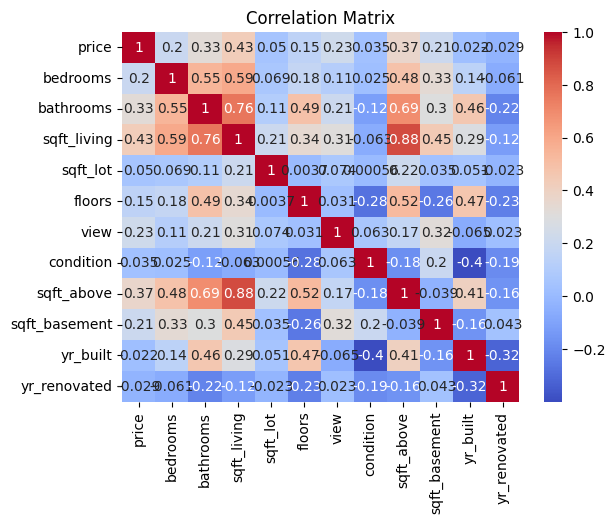

In [7]:
# Convert date column (if applicable)
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Select only numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr = numerical_df.corr()

# Visualize the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [8]:
# Before deduplication
print(f"Shape before deduplication: {df.shape}")

# Perform deduplication
df = df.drop_duplicates()

# After deduplication
print(f"Shape after deduplication: {df.shape}")


Shape before deduplication: (4600, 18)
Shape after deduplication: (4600, 18)


In [9]:
# Replace specific values in a column
# Example: Replace all occurrences of 'NA' in the 'city' column with 'Unknown'
df['city'] = df['city'].replace('NA', 'Unknown')

# Replace a range of values with a specific value
# Example: Replace all negative prices with NaN
df['price'] = df['price'].apply(lambda x: None if x < 0 else x)

print(df.head())


        date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-02-05   313000.0         3       1.50         1340      7912     1.5   
1 2014-02-05  2384000.0         5       2.50         3650      9050     2.0   
2 2014-02-05   342000.0         3       2.00         1930     11947     1.0   
3 2014-02-05   420000.0         3       2.25         2000      8030     1.0   
4 2014-02-05   550000.0         4       2.50         1940     10500     1.0   

  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0          0   0.0          3        1340              0      1955   
1          0   4.0          5        3370            280      1921   
2          0   0.0          4        1930              0      1966   
3          0   0.0          4        1000           1000      1963   
4          0   0.0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Dens

In [10]:
# Example: Binning the 'price' column into categories
bins = [0, 100000, 300000, 500000, 1000000]  # Define bin edges
labels = ['Low', 'Medium', 'High', 'Very High']  # Define bin labels

df['price_bin'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)

print(df[['price', 'price_bin']].head())


       price  price_bin
0   313000.0       High
1  2384000.0        NaN
2   342000.0       High
3   420000.0       High
4   550000.0  Very High


In [11]:
# Check for missing data
print("Missing values in each column:\n", df.isnull().sum())


Missing values in each column:
 date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         4
view               1
condition          0
sqft_above         0
sqft_basement      0
yr_built           0
yr_renovated       0
street             0
city               0
statezip           0
country            1
price_bin        340
dtype: int64


In [12]:
# Drop rows with missing data
df_dropped = df.dropna()
print(f"Shape after dropping missing data: {df_dropped.shape}")


Shape after dropping missing data: (4255, 19)


In [13]:
from sklearn.impute import SimpleImputer

# Example: Impute missing values in 'price' with the mean
imputer = SimpleImputer(strategy='mean')
df['price'] = imputer.fit_transform(df[['price']])


In [14]:
import numpy as np
from scipy.stats import norm

# Example: Estimate missing values in 'price' using MLE
# Separate known data
price_known = df['price'].dropna()

# Estimate parameters for normal distribution
mean, std = norm.fit(price_known)

# Fill missing values with random samples from the estimated distribution
df['price'] = df['price'].apply(
    lambda x: np.random.normal(mean, std) if pd.isnull(x) else x
)

print(df['price'].head())


0     313000.0
1    2384000.0
2     342000.0
3     420000.0
4     550000.0
Name: price, dtype: float64


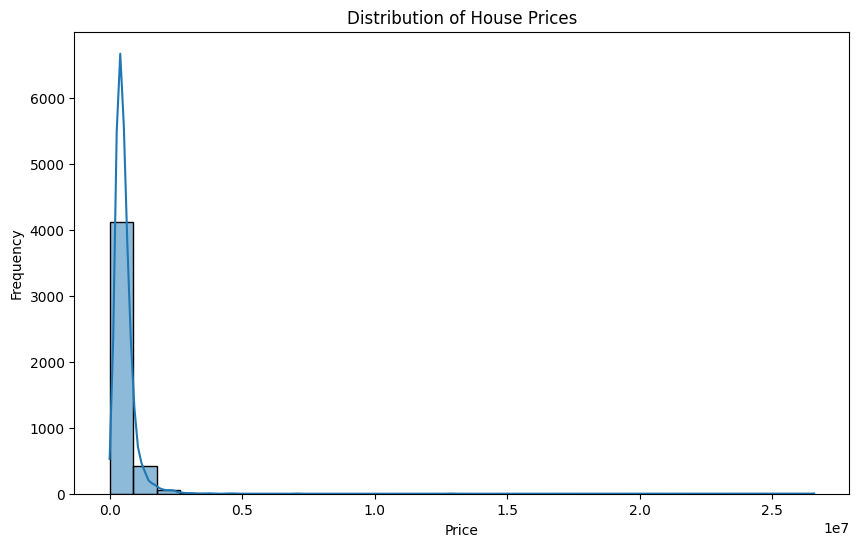

count    4.600000e+03
mean     5.519630e+05
std      5.638347e+05
min      0.000000e+00
25%      3.228750e+05
50%      4.609435e+05
75%      6.549625e+05
max      2.659000e+07
Name: price, dtype: float64


In [15]:
# Univariate Analysis - Distribution of `price`
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Summary statistics for univariate analysis
print(df['price'].describe())


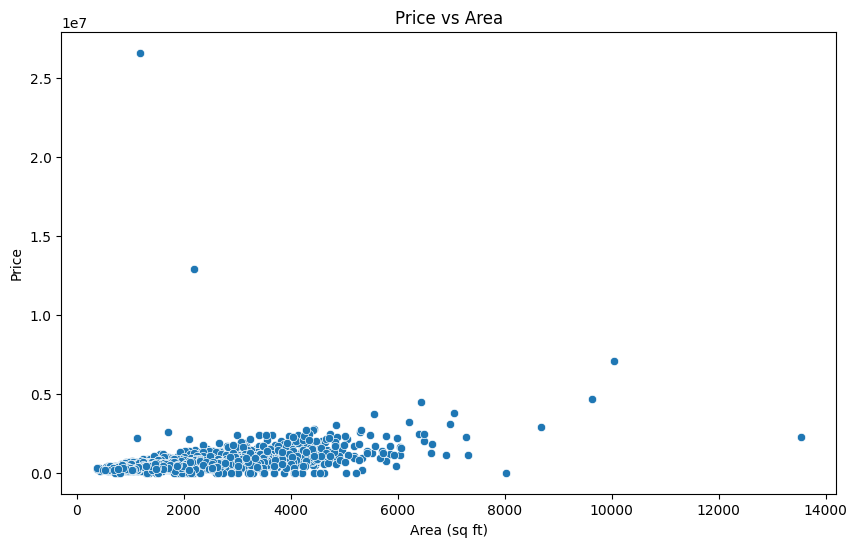

Correlation Matrix:
               price  sqft_living
price        1.00000      0.43041
sqft_living  0.43041      1.00000


In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df)  # Replace 'area' with your column name
plt.title("Price vs Area")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price")
plt.show()

# Correlation between numerical variables
print("Correlation Matrix:")
print(df[['price', 'sqft_living']].corr())


<ipython-input-17-b2dc7ab62eef>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


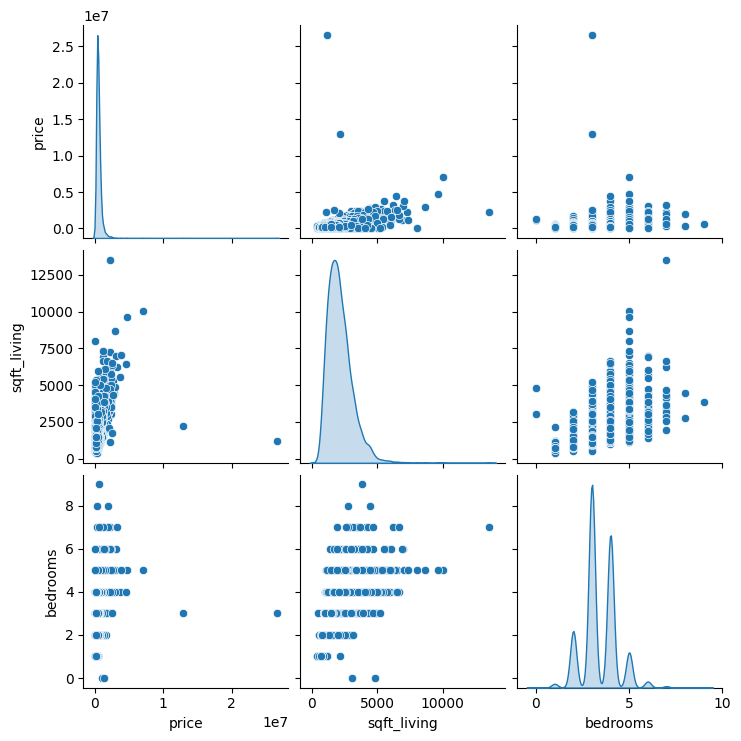

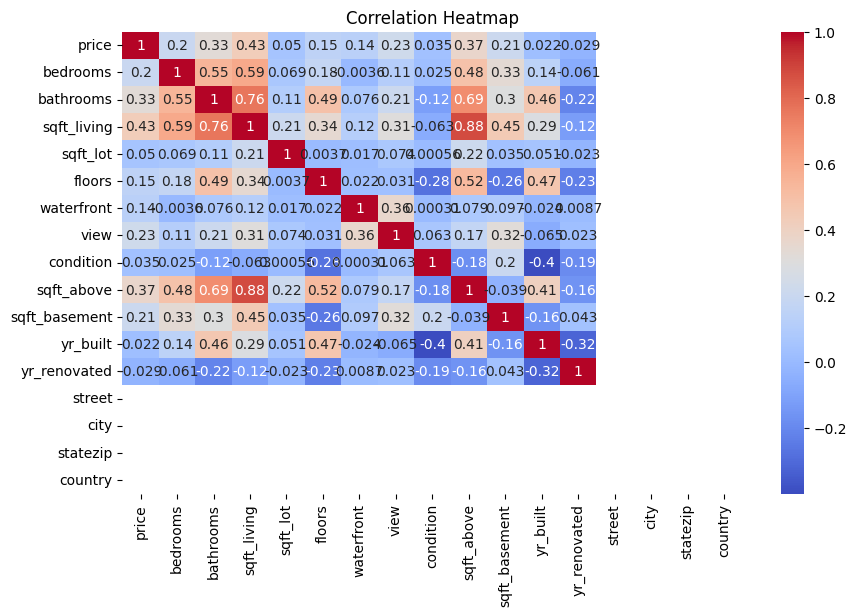

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Convert non-numeric columns to numeric where possible
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle missing values in numeric columns only
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Categorical columns - Replace missing values with mode (if needed)
categorical_cols = df.select_dtypes(include=['category', 'object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Pairplot for multivariate relationships
sns.pairplot(df[['price', 'sqft_living', 'bedrooms']], diag_kind='kde')
plt.show()

# Select numerical columns for correlation
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation
corr = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [18]:
# Set 'date' as the index
df.set_index('date', inplace=True)

print(df.head())


                price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
date                                                                        
2014-02-05   313000.0         3       1.50         1340      7912     1.5   
2014-02-05  2384000.0         5       2.50         3650      9050     2.0   
2014-02-05   342000.0         3       2.00         1930     11947     1.0   
2014-02-05   420000.0         3       2.25         2000      8030     1.0   
2014-02-05   550000.0         4       2.50         1940     10500     1.0   

            waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
date                                                                           
2014-02-05         0.0   0.0          3        1340              0      1955   
2014-02-05         0.0   4.0          5        3370            280      1921   
2014-02-05         0.0   0.0          4        1930              0      1966   
2014-02-05         0.0   0.0          4        1000         

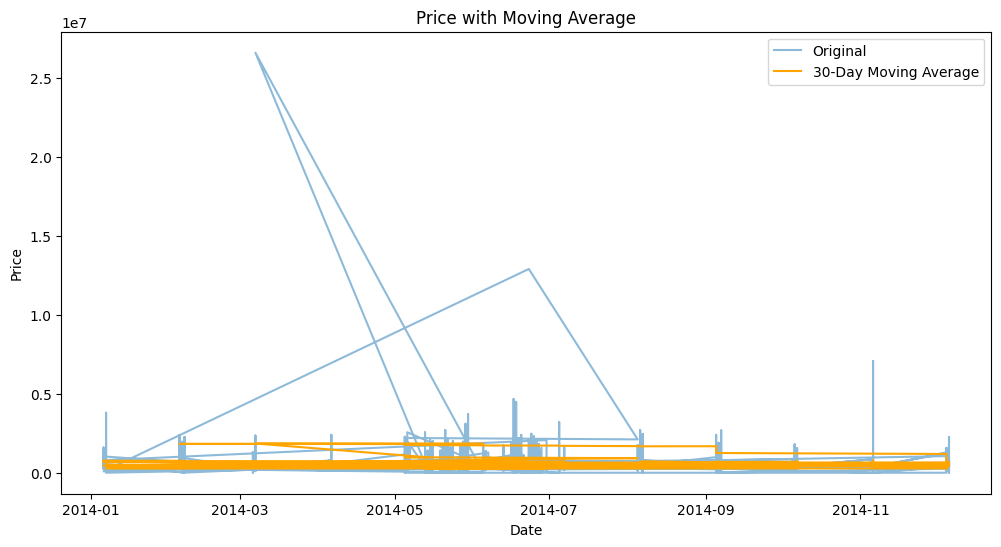

In [19]:
# Plot moving average
df['price_MA'] = df['price'].rolling(window=30).mean()  # 30-day moving average

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['price'], label='Original', alpha=0.5)
plt.plot(df.index, df['price_MA'], label='30-Day Moving Average', color='orange')
plt.title("Price with Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


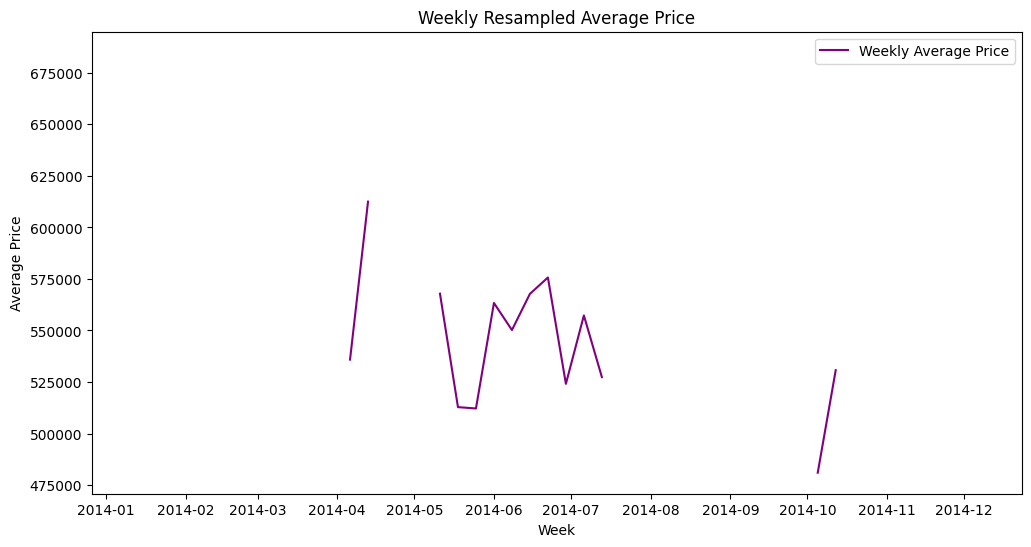

In [20]:
# Resample weekly data
weekly_data = df['price'].resample('W').mean()

plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data, label='Weekly Average Price', color='purple')
plt.title("Weekly Resampled Average Price")
plt.xlabel("Week")
plt.ylabel("Average Price")
plt.legend()
plt.show()


In [21]:
# Statistical summary for the dataset
stat_summary = df.describe()  # Returns count, mean, std, min, 25%, 50%, 75%, max
print(stat_summary)


              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007183     0.240705     3.451739  1827.265435   
std       0.538288     0.084403     0.778397     0.677230   862.168977   
min       

In [22]:
# Data types of each column
print(df.dtypes)

# Number of unique values per column
print(df.nunique())

# Checking for missing data
print(df.isnull().sum())


price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront        float64
view              float64
condition           int64
sqft_above          int64
sqft_basement       int64
yr_built            int64
yr_renovated        int64
street            float64
city              float64
statezip          float64
country           float64
price_bin        category
price_MA          float64
dtype: object
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          3
view                6
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street              0
city                0
statezip            0
country             0
price_bin           4
price_MA         4539
dtype: int64
price               0
bedrooms            0
bathrooms        

In [23]:
# For a single numerical column, e.g., 'price'
price_mean = df['price'].mean()
price_median = df['price'].median()
price_mode = df['price'].mode()[0]
price_std = df['price'].std()

print(f"Price - Mean: {price_mean}, Median: {price_median}, Mode: {price_mode}, Std Dev: {price_std}")


Price - Mean: 551962.9884730434, Median: 460943.46155, Mode: 0.0, Std Dev: 563834.7025468111


In [24]:
# Correlation between two variables (e.g., 'price' and 'sqft_living')
corr_price_sqft = df[['price', 'sqft_living']].corr()
print(corr_price_sqft)


               price  sqft_living
price        1.00000      0.43041
sqft_living  0.43041      1.00000


In [25]:
# Contingency table for two categorical variables, e.g., 'zipcode' and 'bedrooms'
contingency_table = pd.crosstab(df['street'], df['bedrooms'])
print(contingency_table)


Empty DataFrame
Columns: []
Index: []


In [26]:
# Calculating correlations between multiple columns (e.g., 'price', 'sqft_living', 'bedrooms', etc.)
multi_corr = df[['price', 'sqft_living', 'bedrooms', 'bathrooms']].corr()
print(multi_corr)


                price  sqft_living  bedrooms  bathrooms
price        1.000000     0.430410  0.200336   0.327110
sqft_living  0.430410     1.000000  0.594884   0.761154
bedrooms     0.200336     0.594884  1.000000   0.545920
bathrooms    0.327110     0.761154  0.545920   1.000000


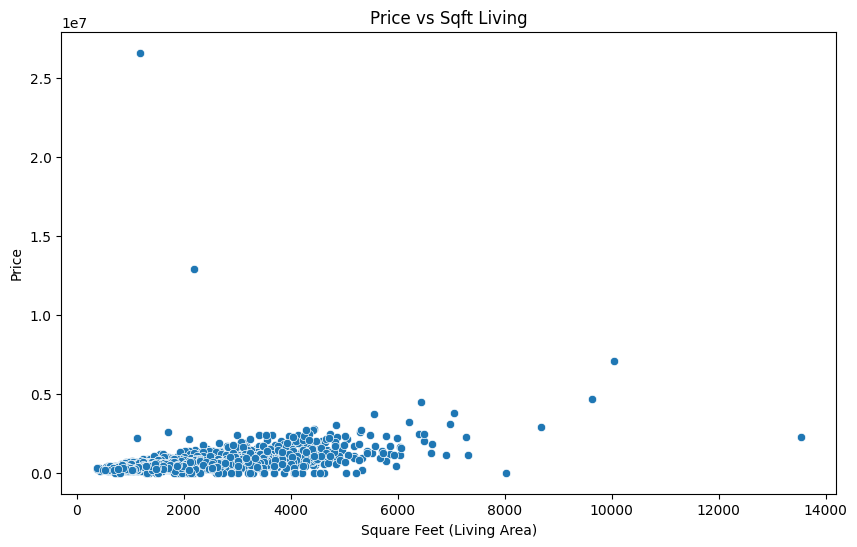

In [27]:
# Scatter plot between 'price' and 'sqft_living'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title("Price vs Sqft Living")
plt.xlabel("Square Feet (Living Area)")
plt.ylabel("Price")
plt.show()


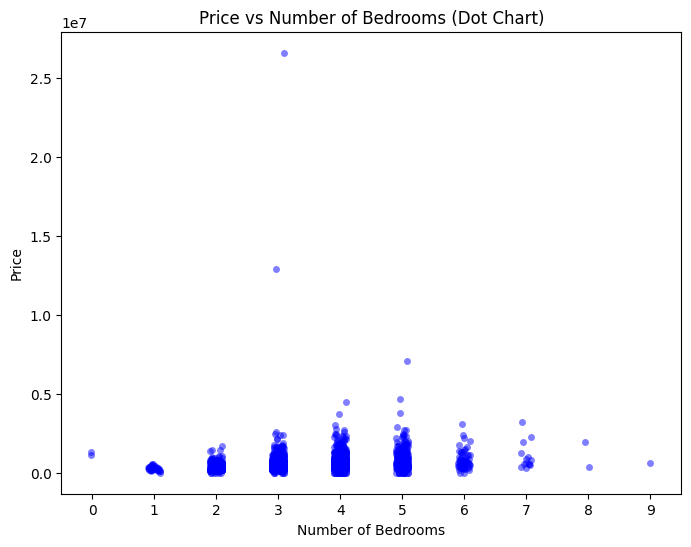

In [28]:
# Dot chart showing the distribution of 'bedrooms'
plt.figure(figsize=(8, 6))
sns.stripplot(x='bedrooms', y='price', data=df, jitter=True, color='blue', alpha=0.5)
plt.title("Price vs Number of Bedrooms (Dot Chart)")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.show()


In [29]:
import pandas as pd

# Print column names to verify the correct column name
print(df.columns)

# Assuming the correct column names are 'statezip' and 'bedrooms'
# Create contingency table for 'statezip' and 'bedrooms'
contingency_table = pd.crosstab(df['statezip'], df['bedrooms'])
print(contingency_table)


Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country',
       'price_bin', 'price_MA'],
      dtype='object')
Empty DataFrame
Columns: []
Index: []


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


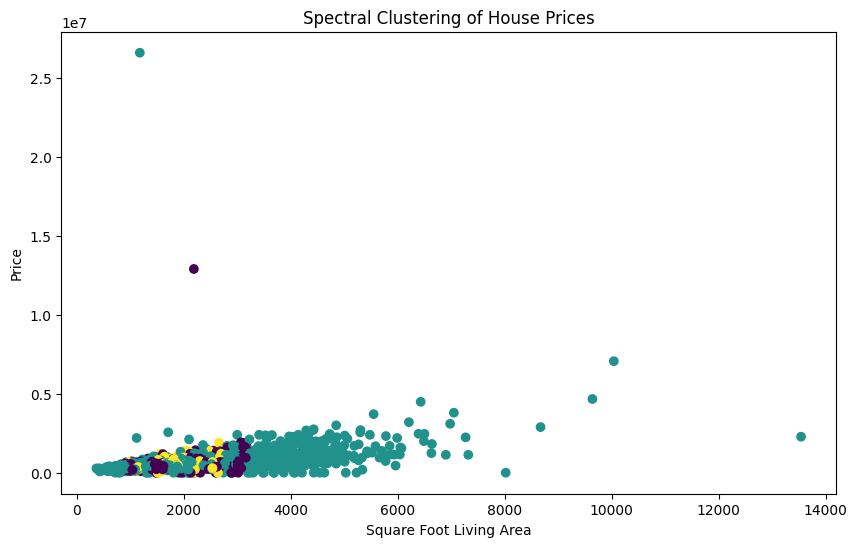

In [30]:
import pandas as pd
import numpy as np
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

# Load your dataset
# df = pd.read_csv('house_price.csv')  # Assuming df is already loaded

# Select features for clustering (you can choose other features)
X = df[['sqft_living', 'bedrooms', 'bathrooms']].values  # Example features

# Perform spectral clustering
sc = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
df['spectral_cluster'] = sc.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['sqft_living'], df['price'], c=df['spectral_cluster'], cmap='viridis')
plt.title("Spectral Clustering of House Prices")
plt.xlabel("Square Foot Living Area")
plt.ylabel("Price")
plt.show()


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Sample text data (replace with your dataset if available)
documents = [
    'House with 3 bedrooms and 2 bathrooms',
    'Spacious 2 bedroom house with a garden',
    'Cozy 1 bedroom apartment near the city center',
    'Modern house with 4 bedrooms and a garage',
    'Studio apartment in the city'
]

# Convert documents to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
X_text = vectorizer.fit_transform(documents)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_text)

# Assign cluster labels
labels = kmeans.labels_

# Display the cluster assignment for each document
for i, doc in enumerate(documents):
    print(f"Document: {doc}\nCluster: {labels[i]}")


Document: House with 3 bedrooms and 2 bathrooms
Cluster: 0
Document: Spacious 2 bedroom house with a garden
Cluster: 0
Document: Cozy 1 bedroom apartment near the city center
Cluster: 1
Document: Modern house with 4 bedrooms and a garage
Cluster: 0
Document: Studio apartment in the city
Cluster: 1


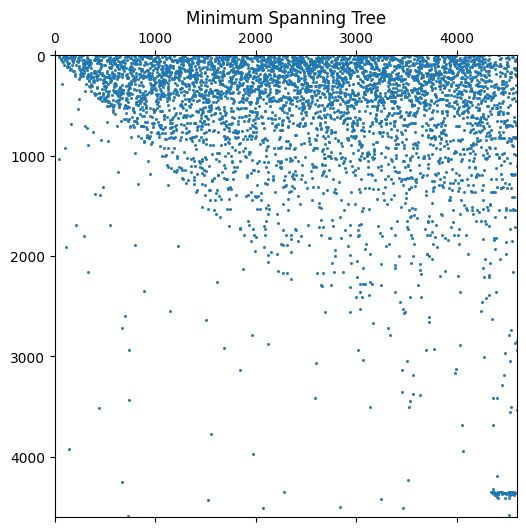

In [32]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse.csgraph import minimum_spanning_tree

# Example dataset
X = df[['sqft_living', 'bedrooms', 'price']].values  # Using these features for clustering

# Find the nearest neighbors
neighbors = NearestNeighbors(n_neighbors=10)
neighbors.fit(X)
adj_matrix = neighbors.kneighbors_graph(X)

# Compute the minimum spanning tree
mst = minimum_spanning_tree(adj_matrix)

# Visualize the MST as a graph
plt.figure(figsize=(10, 6))
plt.spy(mst, markersize=1)
plt.title("Minimum Spanning Tree")
plt.show()


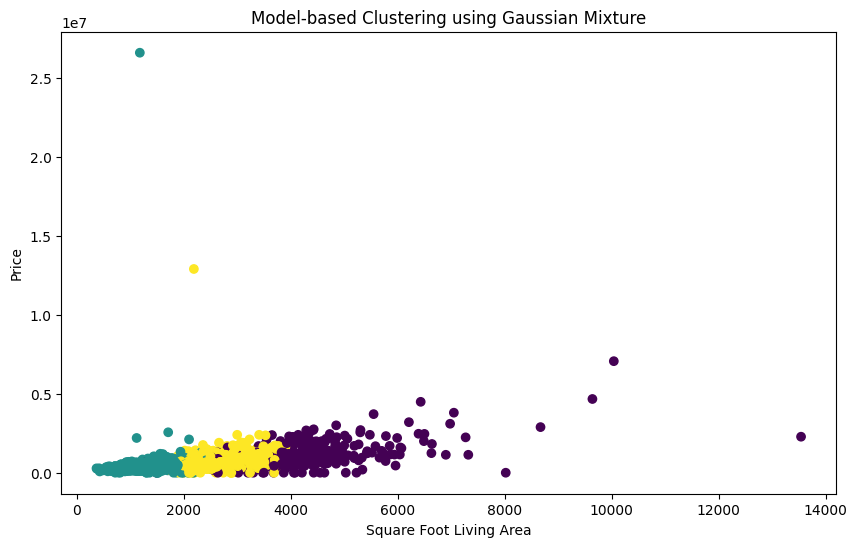

In [33]:
from sklearn.mixture import GaussianMixture

# Select features for clustering
X = df[['sqft_living', 'bedrooms', 'bathrooms']].values

# Fit a Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3, random_state=42)
df['gmm_cluster'] = gmm.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['sqft_living'], df['price'], c=df['gmm_cluster'], cmap='viridis')
plt.title("Model-based Clustering using Gaussian Mixture")
plt.xlabel("Square Foot Living Area")
plt.ylabel("Price")
plt.show()


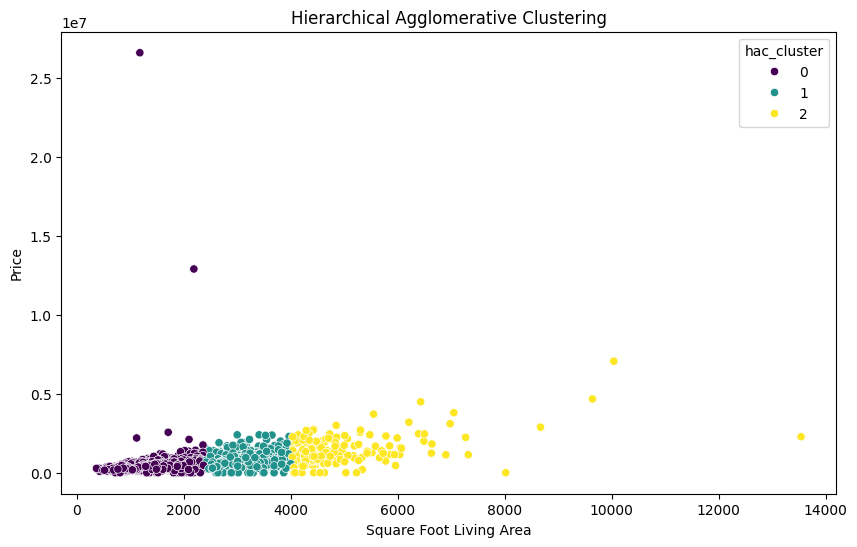

In [34]:
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt

# Select features for clustering
X = df[['sqft_living', 'bedrooms', 'bathrooms']].values

# Perform hierarchical agglomerative clustering with ward linkage
hac = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['hac_cluster'] = hac.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', hue='hac_cluster', data=df, palette='viridis')
plt.title("Hierarchical Agglomerative Clustering")
plt.xlabel("Square Foot Living Area")
plt.ylabel("Price")
plt.show()


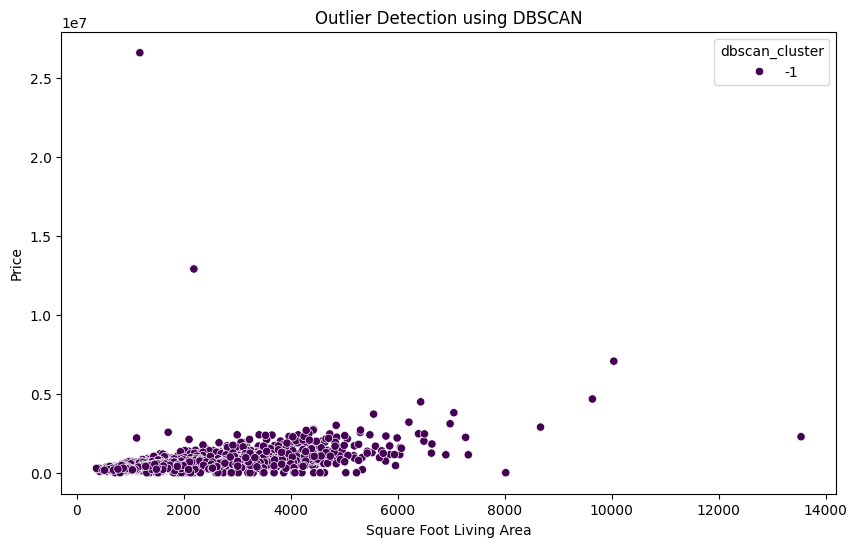

Outliers detected by DBSCAN:
                    price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
date                                                                           
2014-02-05  3.130000e+05         3       1.50         1340      7912     1.5   
2014-02-05  2.384000e+06         5       2.50         3650      9050     2.0   
2014-02-05  3.420000e+05         3       2.00         1930     11947     1.0   
2014-02-05  4.200000e+05         3       2.25         2000      8030     1.0   
2014-02-05  5.500000e+05         4       2.50         1940     10500     1.0   
...                  ...       ...        ...          ...       ...     ...   
2014-09-07  3.081667e+05         3       1.75         1510      6360     1.0   
2014-09-07  5.343333e+05         3       2.50         1460      7573     2.0   
2014-09-07  4.169042e+05         3       2.50         3010      7014     2.0   
2014-10-07  2.034000e+05         4       2.00         2090      6630     1.0   
2014-10-07

In [35]:
from sklearn.cluster import DBSCAN

# Select features for clustering
X = df[['sqft_living', 'bedrooms', 'price']].values

# Perform DBSCAN clustering
db = DBSCAN(eps=0.1, min_samples=5)
df['dbscan_cluster'] = db.fit_predict(X)

# Outliers are labeled as -1
outliers = df[df['dbscan_cluster'] == -1]

# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', hue='dbscan_cluster', data=df, palette='viridis')
plt.title("Outlier Detection using DBSCAN")
plt.xlabel("Square Foot Living Area")
plt.ylabel("Price")
plt.show()

# Display outliers
print("Outliers detected by DBSCAN:\n", outliers)


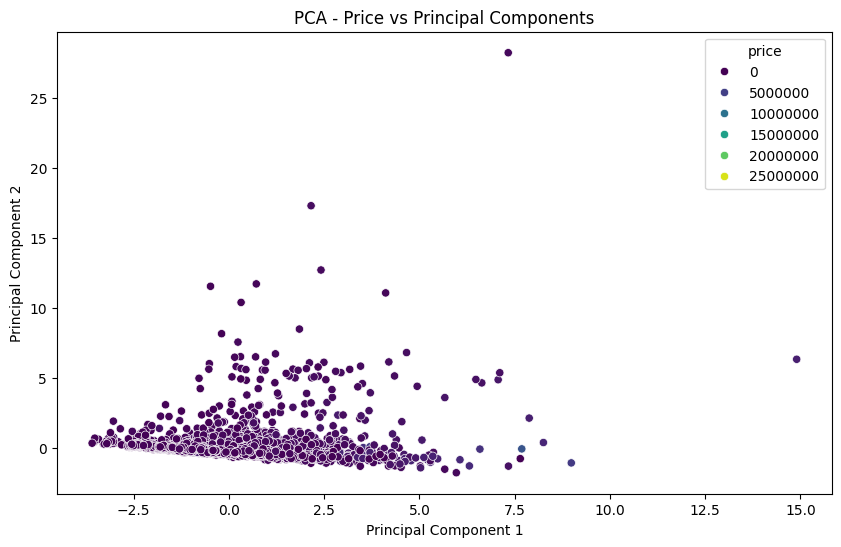

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns for PCA
numerical_data = df[['sqft_living', 'bedrooms', 'bathrooms', 'price', 'sqft_lot']].dropna()

# Reset index of df to align it later
df_reset = df.reset_index()

# Standardize the data before applying PCA
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data[['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot']])

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_result = pca.fit_transform(numerical_data_scaled)

# Create a DataFrame with PCA components
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Add the 'price' column from df_reset (align by index)
pca_df['price'] = df_reset.loc[pca_df.index, 'price'].values

# Plot the PCA result
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='price', palette='viridis')
plt.title("PCA - Price vs Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


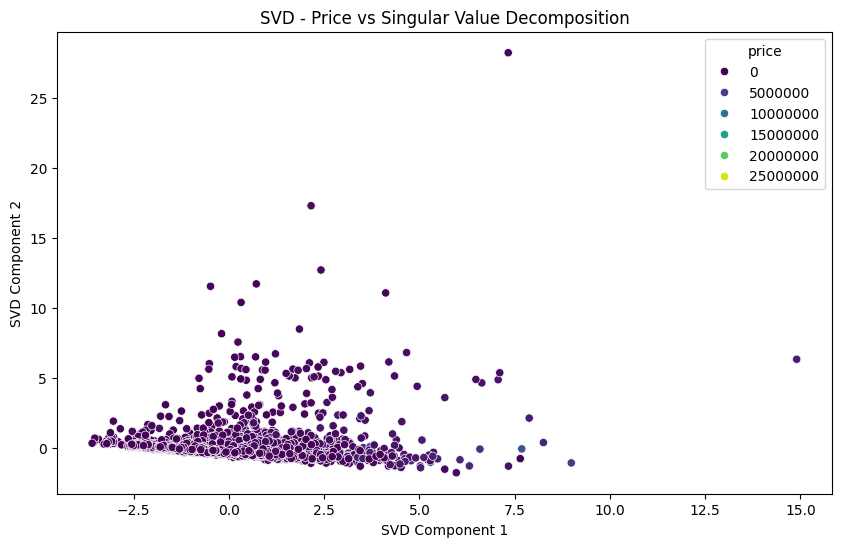

In [37]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns for SVD
numerical_data = df[['sqft_living', 'bedrooms', 'bathrooms', 'price', 'sqft_lot']].dropna()

# Reset index of df to align it later
df_reset = df.reset_index()

# Standardize the data before applying SVD
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data[['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot']])

# Apply SVD (Singular Value Decomposition)
svd = TruncatedSVD(n_components=2)
svd_result = svd.fit_transform(numerical_data_scaled)

# Create a DataFrame with SVD components
svd_df = pd.DataFrame(data=svd_result, columns=['SVD1', 'SVD2'])

# Add the 'price' column from df_reset (align by index)
svd_df['price'] = df_reset.loc[svd_df.index, 'price'].values

# Plot the SVD result
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SVD1', y='SVD2', data=svd_df, hue='price', palette='viridis')
plt.title("SVD - Price vs Singular Value Decomposition")
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.show()


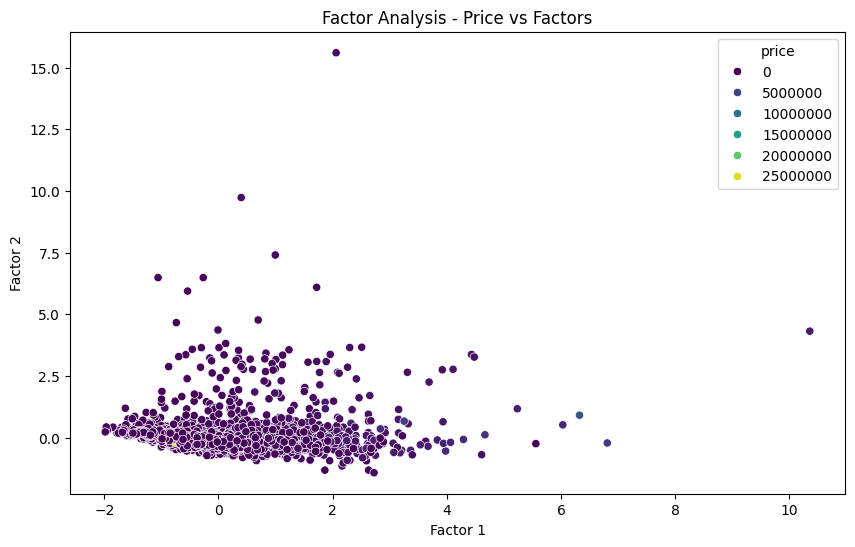

In [40]:
from sklearn.decomposition import FactorAnalysis
import seaborn as sns
import matplotlib.pyplot as plt

# Apply Factor Analysis
fa = FactorAnalysis(n_components=2)
fa_result = fa.fit_transform(numerical_data_scaled)

# Create a DataFrame with Factor Analysis components
fa_df = pd.DataFrame(data=fa_result, columns=['Factor1', 'Factor2'])

# Ensure the indices of fa_df match df
fa_df['price'] = df['price'].values

# Plot the Factor Analysis result
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Factor1', y='Factor2', data=fa_df, hue='price', palette='viridis')
plt.title("Factor Analysis - Price vs Factors")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


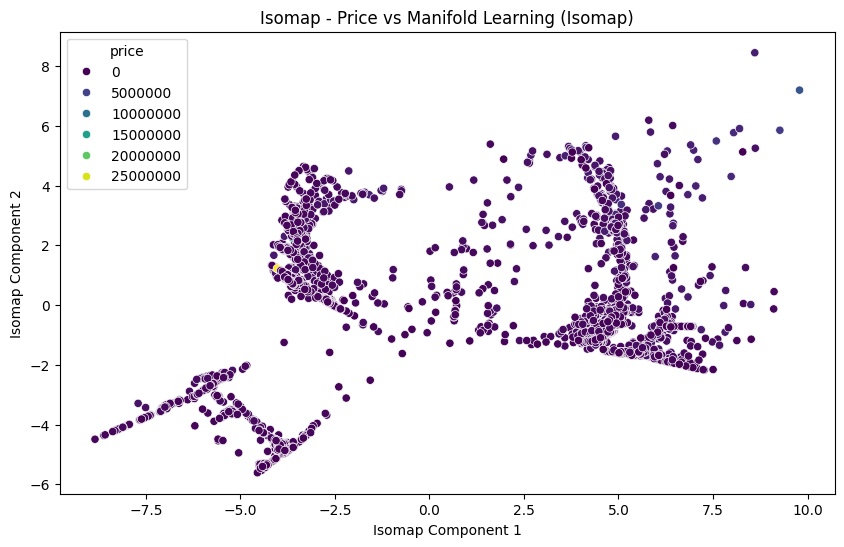

In [42]:
from sklearn.manifold import Isomap
import seaborn as sns
import matplotlib.pyplot as plt

# Apply Isomap
isomap = Isomap(n_components=2)
isomap_result = isomap.fit_transform(numerical_data_scaled)

# Create a DataFrame with Isomap results
isomap_df = pd.DataFrame(data=isomap_result, columns=['Isomap1', 'Isomap2'])

# Ensure the indices of isomap_df match df
isomap_df['price'] = df['price'].values

# Plot the Isomap result
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Isomap1', y='Isomap2', data=isomap_df, hue='price', palette='viridis')
plt.title("Isomap - Price vs Manifold Learning (Isomap)")
plt.xlabel("Isomap Component 1")
plt.ylabel("Isomap Component 2")
plt.show()


In [44]:
!pip install minisom


  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=a53fef6d301c89239f0a3402e5b41e7cafedb845affe83f1e655b735b5695d2f
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


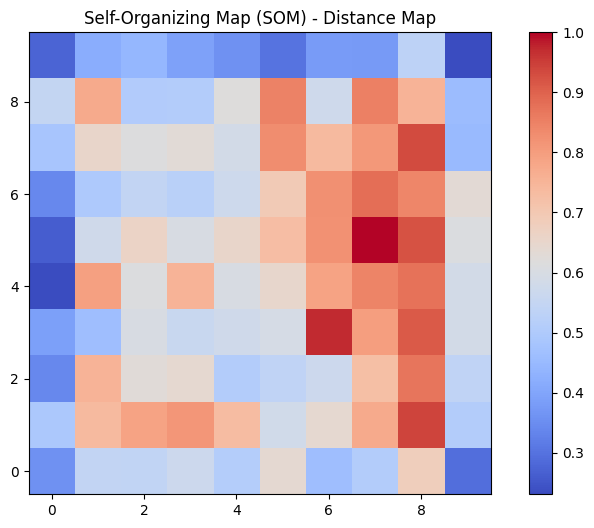

In [45]:
from minisom import MiniSom

# Apply Self-Organizing Map (SOM)
som = MiniSom(x=10, y=10, input_len=numerical_data_scaled.shape[1], sigma=1.0, learning_rate=0.5)
som.train(numerical_data_scaled, 100)

# Get the cluster values from SOM
win_map = som.win_map(numerical_data_scaled)

# Visualize the SOM result
plt.figure(figsize=(10, 6))
plt.imshow(som.distance_map().T, cmap='coolwarm', origin='lower')
plt.colorbar()
plt.title("Self-Organizing Map (SOM) - Distance Map")
plt.show()


Mean Squared Error (MSE): 990083659260.8134
R-squared: 0.029183495254322622


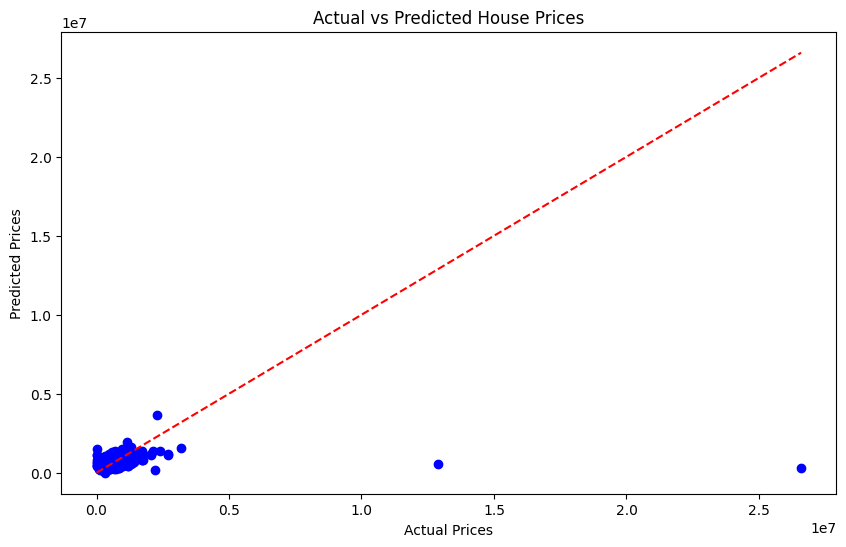

In [46]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming df is already loaded)
# Select features for prediction and target variable
X = df[['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors']]
y = df['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE) and R-squared (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

# Visualizing actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()


In [47]:
import numpy as np

# Simple example: Q-Learning in a grid world (toy example)
# Define the environment and rewards
actions = ['left', 'right', 'up', 'down']
states = [(x, y) for x in range(4) for y in range(4)]  # 4x4 grid world

# Reward matrix: -1 for each step, 10 for goal state (3, 3)
reward_matrix = np.full((4, 4), -1)
reward_matrix[3, 3] = 10  # goal state

# Q-table (state-action values), initialize to 0
Q = np.zeros((16, 4))

# Hyperparameters
gamma = 0.9  # discount factor
alpha = 0.1  # learning rate
epsilon = 0.2  # exploration rate
episodes = 1000  # number of episodes

# Define a function to convert state (x, y) to index
def state_to_index(state):
    return state[0] * 4 + state[1]

# Training the agent using Q-learning
for episode in range(episodes):
    state = (0, 0)  # Start at (0, 0)
    done = False

    while not done:
        state_idx = state_to_index(state)

        # Exploration vs exploitation
        if np.random.rand() < epsilon:
            action = np.random.choice(actions)  # Explore: random action
        else:
            action = actions[np.argmax(Q[state_idx])]  # Exploit: best action based on Q

        # Take action and observe new state (transition)
        if action == 'left':
            next_state = (max(state[0] - 1, 0), state[1])
        elif action == 'right':
            next_state = (min(state[0] + 1, 3), state[1])
        elif action == 'up':
            next_state = (state[0], max(state[1] - 1, 0))
        elif action == 'down':
            next_state = (state[0], min(state[1] + 1, 3))

        next_state_idx = state_to_index(next_state)
        reward = reward_matrix[next_state]  # Get the reward for the new state

        # Update Q-table using the Q-learning formula
        Q[state_idx, actions.index(action)] = Q[state_idx, actions.index(action)] + \
                                               alpha * (reward + gamma * np.max(Q[next_state_idx]) - Q[state_idx, actions.index(action)])

        # Update the state
        state = next_state

        # If we reach the goal state (3, 3), end the episode
        if state == (3, 3):
            done = True

# Print the learned Q-table
print("Learned Q-table:")
print(Q)

# Final policy: Best action for each state
policy = [actions[np.argmax(Q[state_to_index((x, y))])] for x in range(4) for y in range(4)]
print("Optimal Policy:")
for i in range(4):
    print(policy[i*4:i*4+4])


Learned Q-table:
[[ 0.61303523  1.78012601  0.62279775  1.8098    ]
 [ 1.80288267  3.122       0.62516299  3.0749183 ]
 [-0.67934652  4.57990413 -0.09632675  0.76430685]
 [ 1.77187008  6.18763553  0.11526377  0.83553499]
 [-0.77984606 -0.98703036  0.30110752  3.12182306]
 [ 1.80555663  4.40847971  1.77341068  4.58      ]
 [ 3.1012775   6.11850027  3.07532352  6.2       ]
 [ 4.48096341  8.          4.53384399  6.15678091]
 [-0.67341024 -0.76039346 -0.71747171  2.00424939]
 [ 0.07328762 -0.42353289 -0.3743459   6.18110275]
 [ 2.36585263  3.85538863  1.14085821  7.9999991 ]
 [ 6.18761766 10.          6.19234491  7.99036643]
 [-0.62645561 -0.48136681 -0.46693261 -0.46722259]
 [-0.28       -0.267688   -0.32178871  0.87337619]
 [-0.1        -0.1        -0.16365889  8.49905365]
 [ 0.          0.          0.          0.        ]]
Optimal Policy:
['down', 'right', 'right', 'right']
['down', 'down', 'down', 'right']
['down', 'down', 'down', 'right']
['up', 'down', 'down', 'left']
